In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance

Questions to answer:
Есть ли у пациентов с диабетом более высокая вероятность развития сердечных заболеваний в раннем возрасте?

Есть ли определенная демографическая группа, которая подвержена более высокому риску сердечных заболеваний, чем другие?

Снижают ли частые упражнения риск развития сердечных заболеваний?

У курильщиков больше шансов заболеть сердечно-сосудистыми заболеваниями, чем у некурящих?

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Data analysis

In [ ]:
data.info()

In [ ]:
data.head()

## Are age and sex markers for death?

In [ ]:
plt.hist(data['age'], color='green', edgecolor = 'black',bins = int(100/10), label='all', alpha=0.4)
plt.hist(data[data['DEATH_EVENT'] == 1]['age'], color = 'yellow', edgecolor = 'black', bins = int(100/10), label='dead',
         alpha=0.5)
plt.legend()
plt.title('Amount of death events per age group')
plt.xlabel('Age')
plt.ylabel('Death count')

Death of people around 60 is more likely compared to other groups. We also see that age is a big reason for death as almost all people over 85 are dead.

In [ ]:
plt.hist(data[data['DEATH_EVENT'] == 1]['sex'], color = 'blue', edgecolor = 'black',
         bins = int(4), alpha=0.5)
plt.title('Amount of death events for males and females (0 - female, 1 - male)')
plt.xlabel('Sex')
plt.ylabel('Death count')

There are almost twice as many deaths in males compared to females. Let's see in persentage

In [ ]:
male = data[data['sex'] == 1]
female = data[data['sex'] == 0]

pie_info = [len(male[male['DEATH_EVENT'] == 1]), len(male[male['DEATH_EVENT'] == 0]), len(female[female['DEATH_EVENT'] == 1]), len(female[female['DEATH_EVENT'] == 0])]
labels = ['male - dead', 'male - survived', 'female - dead', 'female - survived']

fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis')
ax.pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
ax.set_title('Pie chart of death and sex info')

We can see that there are more data about men.

## Let's see data correlation using sns heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax)
plt.show()

We are interested in any correlation with DEATH_EVENT, anaemia, high blood pressure. First thing I'd like to to analyze is the correlation between death and serum creatinine. \
\
The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L) For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(data['serum_creatinine'], vert=False)
plt.xlabel('Value')
plt.title("Serum creatinine distribution")
plt.grid()

In [ ]:
# Let's see if outliers are more likely to end up dead

outliers = data[data['serum_creatinine'] > 1.35]
normal = data[data['serum_creatinine'] <= 1.35]

pie_info = [len(outliers[outliers['DEATH_EVENT'] == 1]), len(outliers[outliers['DEATH_EVENT'] == 0])]
labels = ['high creatinin lvl - dead', 'high creatinin lvl - survived']
fig, ax1 = plt.subplots()
ax1.pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
ax1.set_title('Pie chart of correlation betweeen death and high creatinin level')

In [ ]:
pie_info = [len(normal[normal['DEATH_EVENT'] == 1]), len(normal[normal['DEATH_EVENT'] == 0])]
labels = ['low creatinin lvl - dead', 'low creatinin lvl - survived']
fig, ax = plt.subplots()
ax.pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
ax.set_title('Pie chart of correlation betweeen death and low creatinin level')

We see that people with higher creatinine level are more likely to die.

## Are patients with diabetes more likely to develop heart disease at an early age?


In [ ]:
# first, let's see diabetes distribution
plt.hist(data['age'], color='green', edgecolor = 'black',bins = int(100/10), label='all', alpha=0.4)
plt.hist(data[data['diabetes'] == 1]['age'], color = 'yellow', edgecolor = 'black', bins = int(100/10), label='diabetes', alpha=0.3)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Diabetes')

In [ ]:
diabetes = data[data['diabetes'] == 1]
no_diabetes = data[data['diabetes'] == 0]

print('Average age of death in people with diabetes: ', diabetes[diabetes['DEATH_EVENT'] == 1]['age'].mean())
print('Average age of death in people without diabetes: ', no_diabetes[no_diabetes['DEATH_EVENT'] == 1]['age'].mean())

In [ ]:
x = ['diabetes', 'no diabetes']
y = [len(diabetes[diabetes['high_blood_pressure'] == 1])/len(diabetes)*100, 
    len(no_diabetes[no_diabetes['high_blood_pressure'] == 1])/len(no_diabetes)*100]

plt.pie(y, labels=x, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
plt.title('Correlation between high blood pressure and diabetes, in persentage')

We see no correlation between diabetes and high blood pressure, data for both groups is almost identical.

## Let's see if there's any correlation between smoking and diseases.

In [ ]:
smokers = data[data['smoking'] == 1]
non_smokers = data[data['smoking'] == 0]

print(' Smokers: ', len(smokers), 'people.')
print(' Non-smokers: ', len(non_smokers), 'people.')

In [ ]:
plt.hist(data['smoking'], color = 'blue', edgecolor = 'black',
         bins = int(4), alpha=0.5, label='all people')
plt.hist(data[data['DEATH_EVENT'] == 1]['smoking'], color = 'green', edgecolor = 'black',
         bins = int(4), alpha=0.5, label='dead')
plt.legend()
plt.title('Amount of death events for smokers and non_smokers (0 - non-smokers, 1 - smokers)')
plt.xlabel('Sex')
plt.ylabel('Amount')

We can see that there's much more deaths in non-smoking people, but compared to smokers, but it is dataset problem (too small and has a lot of smokers) and not really valid data.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
pie_info = [len(smokers[smokers['DEATH_EVENT'] == 1]), len(smokers[smokers['DEATH_EVENT'] == 0])]
labels = ['smokers - dead', 'smokers - survived']
axs[0].pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))

pie_info = [len(non_smokers[non_smokers['DEATH_EVENT'] == 1]), len(non_smokers[non_smokers['DEATH_EVENT'] == 0])]
labels = ['non-smokers - dead', 'non-smokers - survived']
axs[1].pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))

In propotion, we see no correlation between smoking and heart failure.

## Now, let's build classification model.

In [ ]:
y = data['DEATH_EVENT']
x = data.drop(['DEATH_EVENT'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
rf = RandomForestClassifier(verbose=True)
rf_params = {"max_depth": range(3,19,3),
             "max_features": range(3,12,2),
             "n_estimators": [10, 500, 1000],
             "min_samples_split": [2, 5, 10]}
grid = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose=True)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
rf_params = {"max_depth": range(5,8,1),
             "max_features": range(6,9,1),
             "n_estimators": range(2,500, 50),
             "min_samples_split": [10, 20, 30, 40, 50]}

In [ ]:
grid = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [88]:
rf = RandomForestClassifier(max_depth=6,
 max_features=6,
 min_samples_split=20,
 n_estimators=152)

In [89]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=6, min_samples_split=20,
                       n_estimators=152)

In [90]:
y_pred = rf.predict(x_test)
print(f'model accuracy: {accuracy_score(y_pred, y_test)*100}%')

model accuracy: 83.33333333333334%


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.88      0.65      0.75        23

    accuracy                           0.83        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.84      0.83      0.83        60



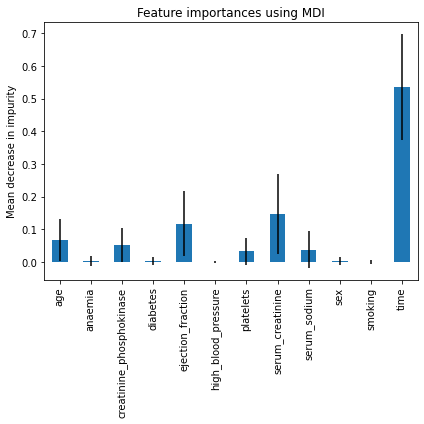

In [68]:
feature_names = rf.feature_names_in_
rf_importances = pd.Series(rf.feature_importances_, index=feature_names)
std = np.std([rf.feature_importances_ for rf in rf.estimators_], axis=0)

fig, ax = plt.subplots(figsize=(6,6))
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

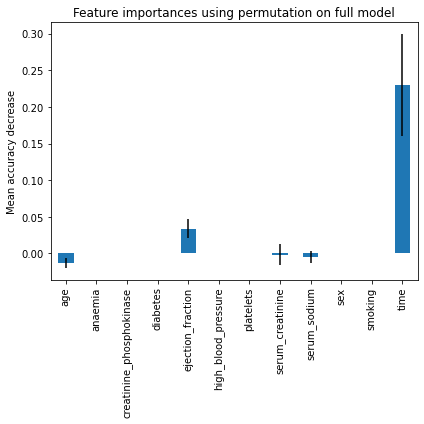

In [69]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
rf_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize=(6,6))
rf_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Let's drop 5 the least important features and build new model.

In [71]:
y = data['DEATH_EVENT']
x = data.drop(['sex', 'smoking', 'high_blood_pressure', 'anaemia', 'diabetes', 'DEATH_EVENT'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [82]:
rf = RandomForestClassifier(max_depth=7,
 max_features=1,
 min_samples_split=20,
 n_estimators=152)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
print(f'model accuracy: {accuracy_score(y_pred, y_test)*100}%')

model accuracy: 85.0%


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60



we've build new model with 85% accuracy.